### **Car Price Prediction using Linear Regression**

### **Problem Statement:**

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company since they want to understand the factors on which pricing of a car depends. They want to do this for the cars produced by the American and European countries, since their design is very different from the Chinese cars. Essentially the company wants to know:

* Which variables are highly significant in estimating the price of a car
* How well those important variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the world and their attributes. 

### **Objective:**

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

### **Data analysis process:**

Analysis will be done as follows.

1. Understanding data
2. Data cleaning (Removing duplicates, treating outiliers and missing values etc.)
3. Exporatory data analysis
4. Model building
5. Model evaluation

In [1]:
# Load the following packages.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

### **Understanding the data**

In [3]:
# Load dataset and save it as "carprice".

carprice = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
# View the structure of dataframe carprice.

carprice

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
# Checking if any column has null values.

carprice.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### **Data Preparation**

In [6]:
# Converting "CarName" to lower case.

carprice["CarName"] = carprice["CarName"].str.lower()

In [7]:
# Replacing wrong carnames with correct carnames.

carprice["CarName"] = carprice["CarName"].str.replace("alfa-romero giulia","alfa-romeo giulia")

carprice["CarName"] = carprice["CarName"].str.replace("alfa-romero stelvio","alfa-romeo stelvio")

carprice["CarName"] = carprice["CarName"].str.replace("alfa-romero quadrifoglio","alfa-romeo quadrifoglio")

carprice["CarName"] = carprice["CarName"].str.replace("maxda rx3","mazda rx3")

carprice["CarName"] = carprice["CarName"].str.replace("maxda glc deluxe","mazda glc deluxe")

carprice["CarName"] = carprice["CarName"].str.replace("porcshce panamera","porsche panamera")

carprice["CarName"] = carprice["CarName"].str.replace("toyouta tercel","toyota tercel")

carprice["CarName"] = carprice["CarName"].str.replace("vokswagen rabbit","volkswagen rabbit")

carprice["CarName"] = carprice["CarName"].str.replace("vw dasher","volkswagen dasher")

carprice["CarName"] = carprice["CarName"].str.replace("vw rabbit","volkswagen rabbit")

In [8]:
# Extracting only company name from "CarName" and storing it as "companyname"

new_col = carprice["CarName"].str.split(" ", n = 1, expand = True)

carprice["companyname"] = new_col[0]

# Dropping column "CarName" from carprice data.

carprice.drop(["CarName"], axis = 1, inplace = True)

In [9]:
# Replacing "cylindernumber" with it's numeric value.

carprice["cylindernumber"] = carprice["cylindernumber"].str.replace("eight","8")

carprice["cylindernumber"] = carprice["cylindernumber"].str.replace("five","5")

carprice["cylindernumber"] = carprice["cylindernumber"].str.replace("four","4")

carprice["cylindernumber"] = carprice["cylindernumber"].str.replace("six","6")

carprice["cylindernumber"] = carprice["cylindernumber"].str.replace("three","3")

carprice["cylindernumber"] = carprice["cylindernumber"].str.replace("twelve","12")

carprice["cylindernumber"] = carprice["cylindernumber"].str.replace("two","2")

In [10]:
# Converting "cylindernumber" to numeric in order use it in the calculation of "displacement".

carprice["cylindernumber"] = pd.to_numeric(carprice["cylindernumber"])

In [11]:
# Calculating "displacement" using "boreratio", "stroke" and "cylindernumber".

carprice["displacement"] = 0.785 * carprice["boreratio"] * carprice["boreratio"] * carprice["stroke"] * carprice["cylindernumber"]

In [12]:
# Converting "cylindernumber" again to datatype object.

carprice["cylindernumber"] = carprice["cylindernumber"].astype(str)

### **Outlier treatment**

In [13]:
# Extracting only numeric columns from carprice.

numeric_cols = carprice.select_dtypes(include = 'number')

In [15]:
# Dropping column "car_ID" and "price".

numeric_cols.drop(["car_ID", "price"], axis = 1, inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


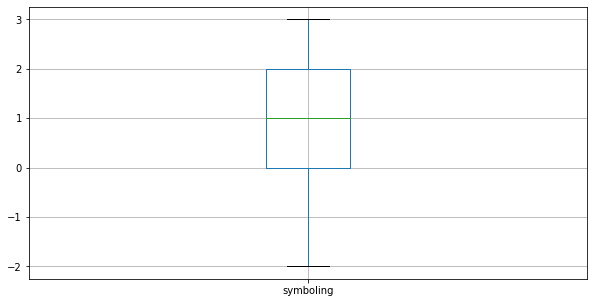

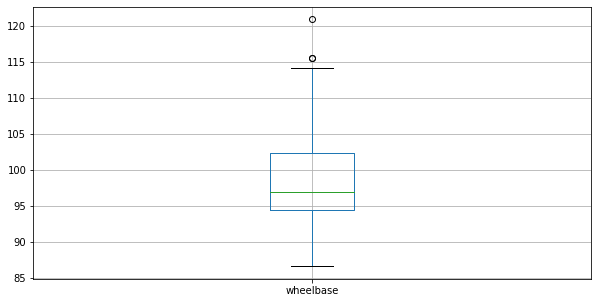

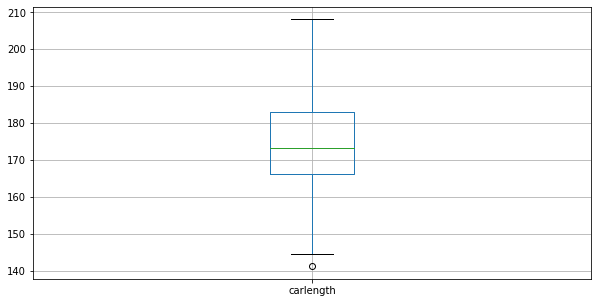

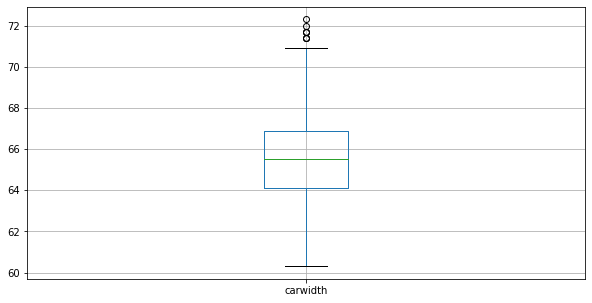

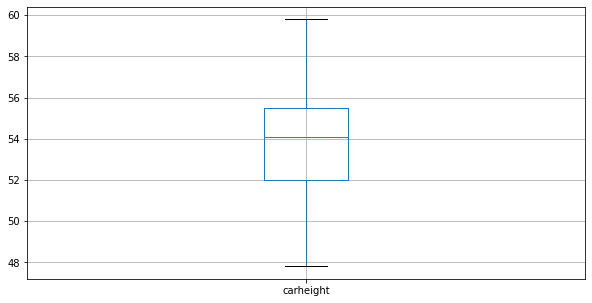

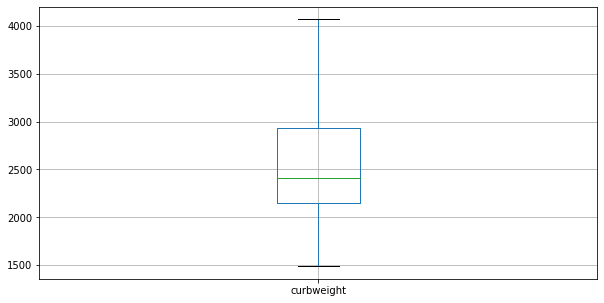

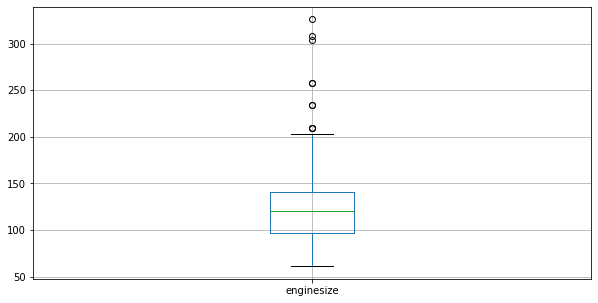

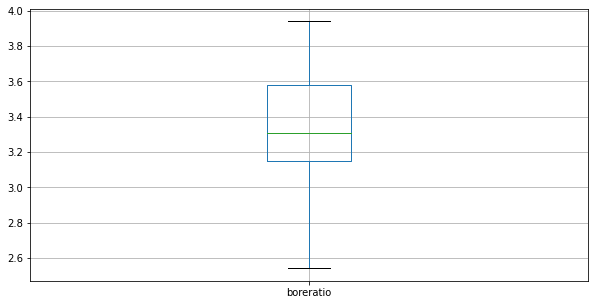

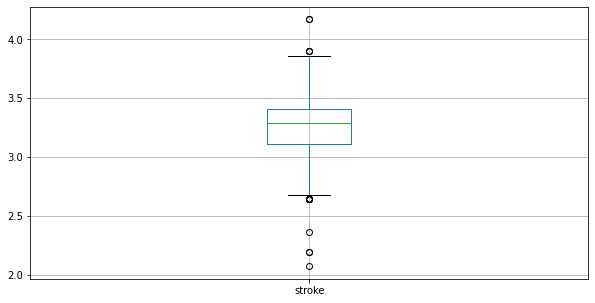

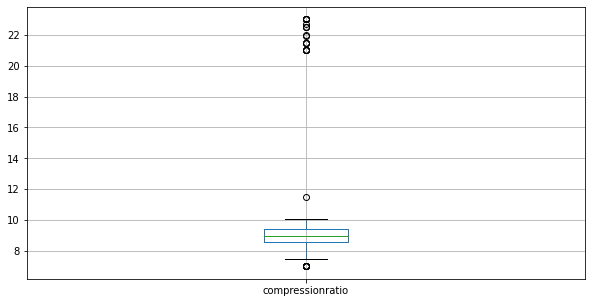

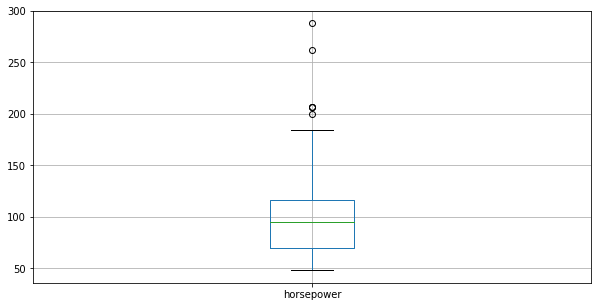

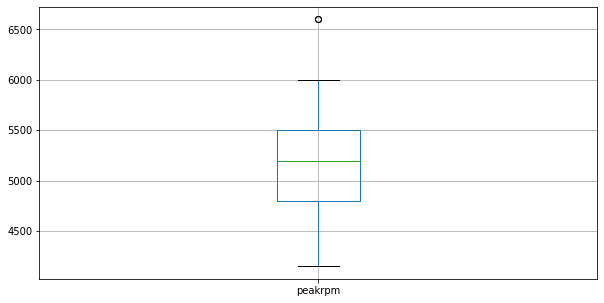

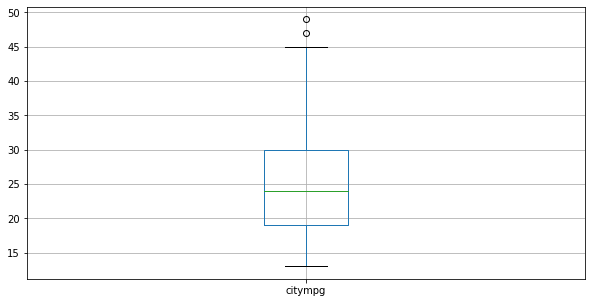

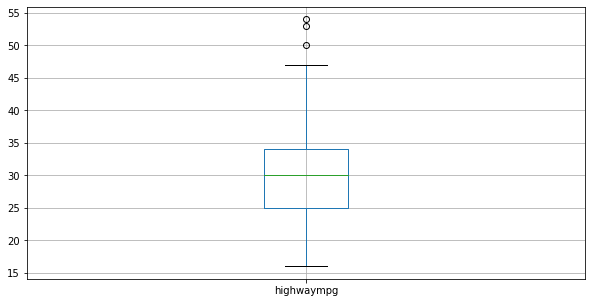

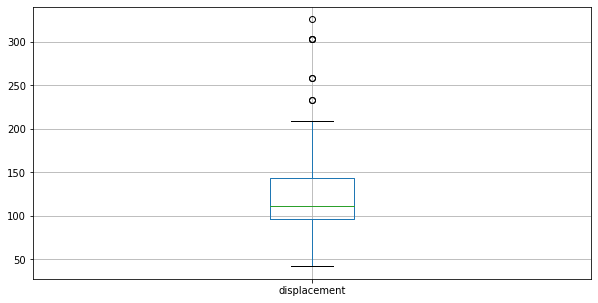

In [16]:
# Plotting boxplots for all continous variables in order to detect outliers.

for column in numeric_cols:
    plt.figure(figsize = (10,5))
    numeric_cols.boxplot([column])
    
# Some variables have outliers. These outliers will be treated in the next step.

In [17]:
# Flooring and capping ouliers.

for col in numeric_cols.columns:
    Q1 = numeric_cols[col].quantile(0.25)
    Q3 = numeric_cols[col].quantile(0.75)
    IQR = Q3 - Q1 
    Lower_cap  = Q1 - 1.5*IQR
    Upper_cap = Q3 + 1.5*IQR
    numeric_cols[col][numeric_cols[col] <= Lower_cap] = Lower_cap
    numeric_cols[col][numeric_cols[col] >= Upper_cap] = Upper_cap

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we 

In [19]:
# Dropping following columns from carprice.

carprice.drop(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'displacement'], axis = 1, inplace = True)

In [20]:
# Setting indices.

numeric_cols.reset_index(drop = True, inplace = True)

carprice.reset_index(drop = True, inplace = True)

In [21]:
# Joining df "numeric_cols" and df "carprice".

carprice = pd.concat([carprice, numeric_cols], axis = 1)

carprice

,car_ID,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,displacement
0,1,gas,std,two,convertible,rwd,front,dohc,4,mpfi,...,2548,130,3.47,2.68,9.0,111,5000,21.0,27.0,101.326582
1,2,gas,std,two,convertible,rwd,front,dohc,4,mpfi,...,2548,130,3.47,2.68,9.0,111,5000,21.0,27.0,101.326582
2,3,gas,std,two,hatchback,rwd,front,ohcv,6,mpfi,...,2823,152,2.68,3.47,9.0,154,5000,19.0,26.0,117.386991
3,4,gas,std,four,sedan,fwd,front,ohc,4,mpfi,...,2337,109,3.19,3.40,10.0,102,5500,24.0,30.0,108.640044
4,5,gas,std,four,sedan,4wd,front,ohc,5,mpfi,...,2824,136,3.19,3.40,8.0,115,5500,18.0,22.0,135.800054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,gas,std,four,sedan,rwd,front,ohc,4,mpfi,...,2952,141,3.78,3.15,9.5,114,5400,23.0,28.0,141.326564
201,202,gas,turbo,four,sedan,rwd,front,ohc,4,mpfi,...,3049,141,3.78,3.15,8.7,160,5300,19.0,25.0,141.326564
202,203,gas,std,four,sedan,rwd,front,ohcv,6,mpfi,...,3012,173,3.58,2.87,8.8,134,5500,18.0,23.0,173.248250
203,204,diesel,turbo,four,sedan,rwd,front,ohc,6,idi,...,3217,145,3.01,3.40,10.6,106,4800,26.0,27.0,145.088441


In [22]:
# Labelling values less than 0 in "symboling" as "safe" and values greater than 0 as "risky".

carprice['symboling'] = carprice['symboling'].apply(lambda x: 'safe' if x < 0 else 'risky')

### **Exploratory data analysis**

### **Effect of categorical variables on price of cars**

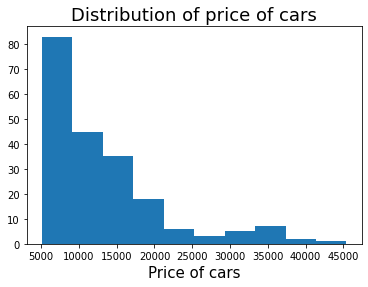

In [23]:
# Distribution of price of cars.

plt.hist(carprice['price'])

plt.xlabel("Price of cars", size = 15)

plt.title("Distribution of price of cars", size = 18)

plt.show()

# Most cars have price around 5000 - 10000 USD.

Text(0.5, 1.0, 'Company wise price of cars')

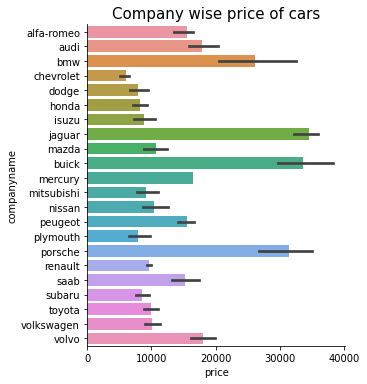

In [24]:
# Company wise distribution of price of cars.

sns.catplot(x = "price", y = "companyname", orient = "h", kind = "bar", data = carprice)

plt.title("Company wise price of cars", size = 15)

# Companies like Buick, Porsche, Jaguar and BMW produce expensive cars.

<AxesSubplot:xlabel='enginetype', ylabel='price'>

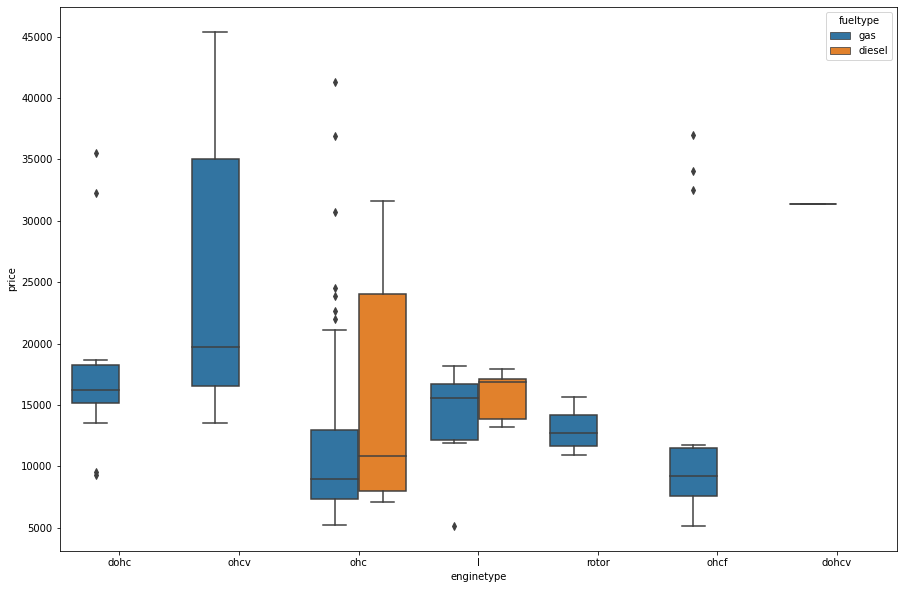

In [25]:
# Effect of enginetype and fueltype on price of cars.

plt.figure(figsize = (15,10))

sns.boxplot(x = 'enginetype', y = 'price', hue ='fueltype', data = carprice)

# Cars with ohcv engines and gas as fuel are more expensive.

<AxesSubplot:xlabel='cylindernumber', ylabel='price'>

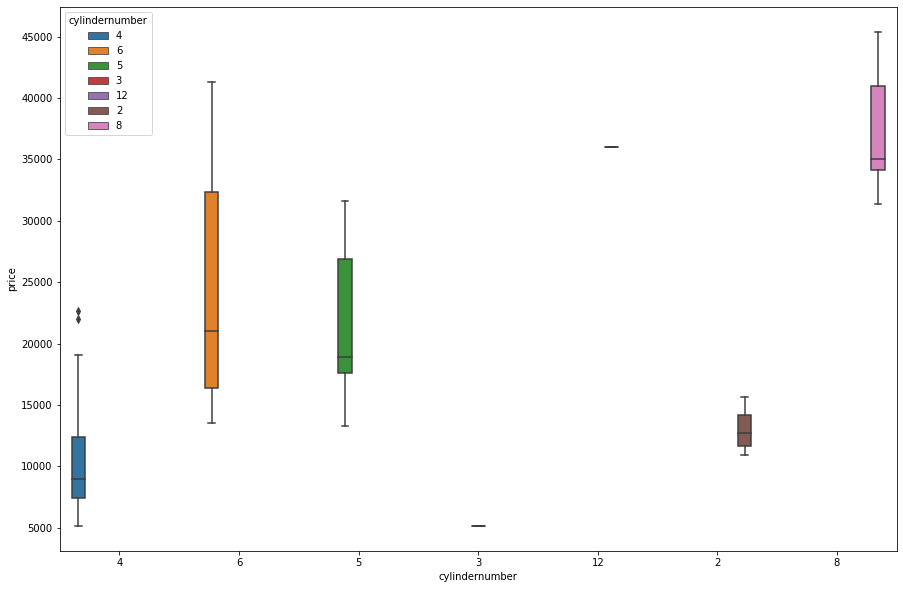

In [26]:
# Effect of cylindernumber on price of cars.

plt.figure(figsize = (15,10))

sns.boxplot(x = 'cylindernumber', y = 'price', hue = "cylindernumber", data = carprice)

# As the cylindernumber increases, price of the car increases.

<AxesSubplot:xlabel='carbody', ylabel='price'>

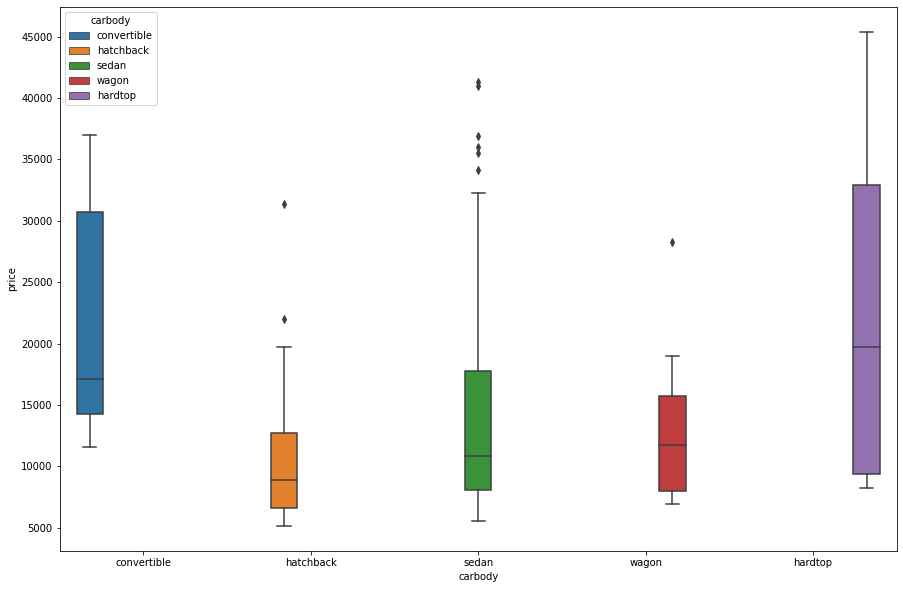

In [27]:
# Effect of carbody on price of cars.

plt.figure(figsize = (15,10))

sns.boxplot(x = 'carbody', y = 'price', hue = "carbody", data = carprice)

# Cars with carbody hardtop and convertible are more expensive.

<AxesSubplot:xlabel='drivewheel', ylabel='price'>

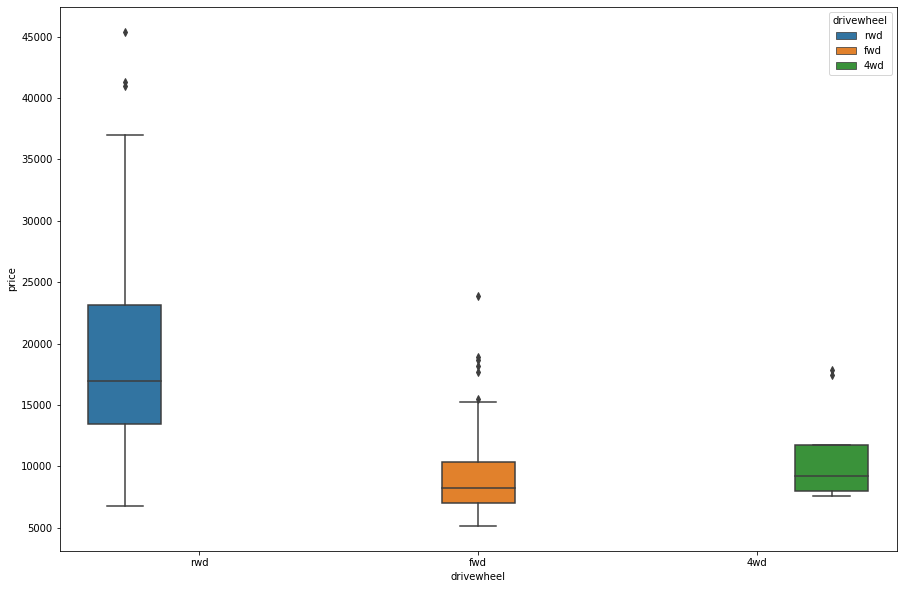

In [28]:
# Effect of drivewheel on price of cars.

plt.figure(figsize = (15,10))

sns.boxplot(x = 'drivewheel', y = 'price', hue = "drivewheel", data = carprice)

# Cars with drivewheel rwd are more expensive.

<AxesSubplot:xlabel='doornumber', ylabel='price'>

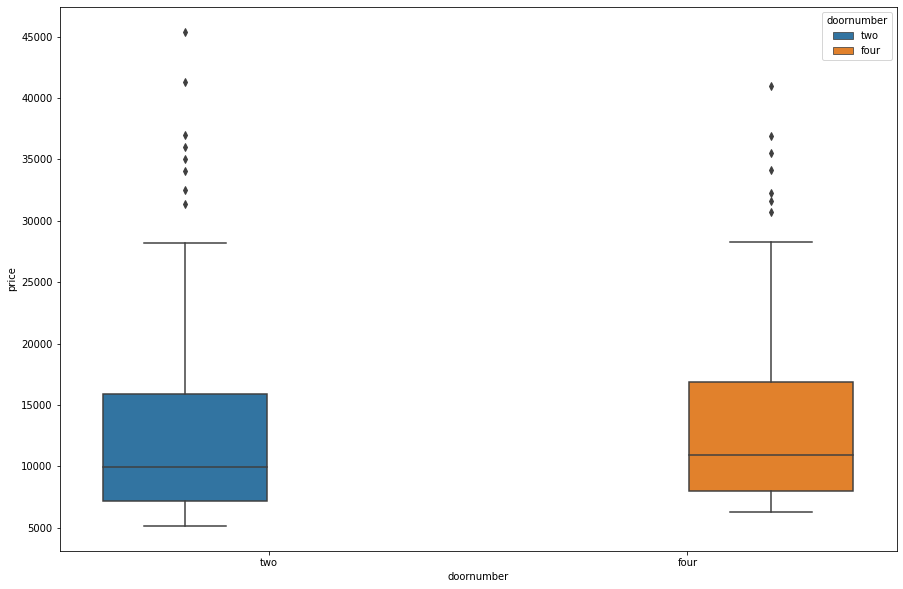

In [29]:
# Effect of doornumber on price of cars.

plt.figure(figsize = (15,10))

sns.boxplot(x = 'doornumber', y = 'price', hue = "doornumber", data = carprice)

# Cars with four door are expensive.        

<AxesSubplot:xlabel='enginelocation', ylabel='price'>

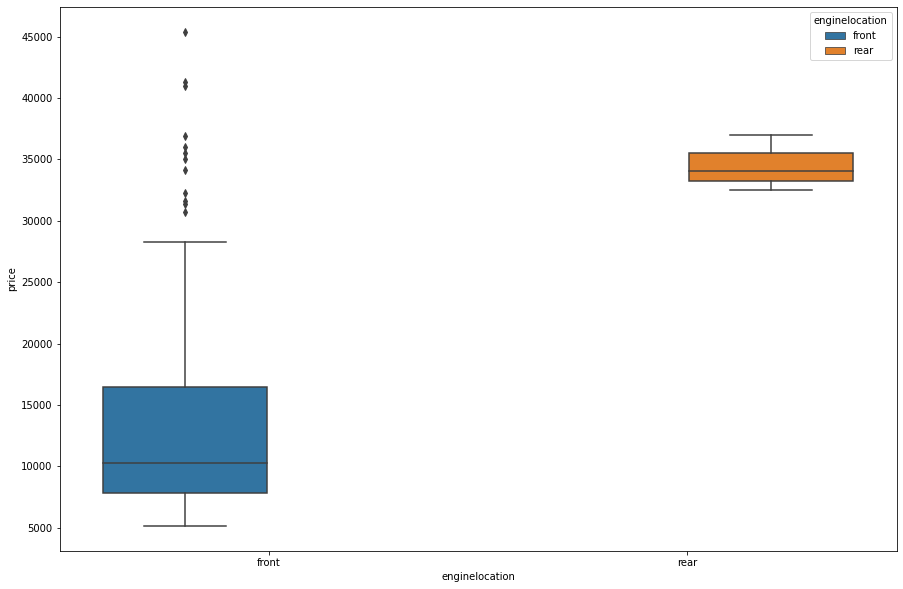

In [30]:
# Effect of enginelocation on price of cars.

plt.figure(figsize = (15,10))

sns.boxplot(x = 'enginelocation', y = 'price', hue = "enginelocation", data = carprice)

# Cars with rear engine are expensive.

### **Effect of continuous varibles on price of cars.**

<AxesSubplot:>

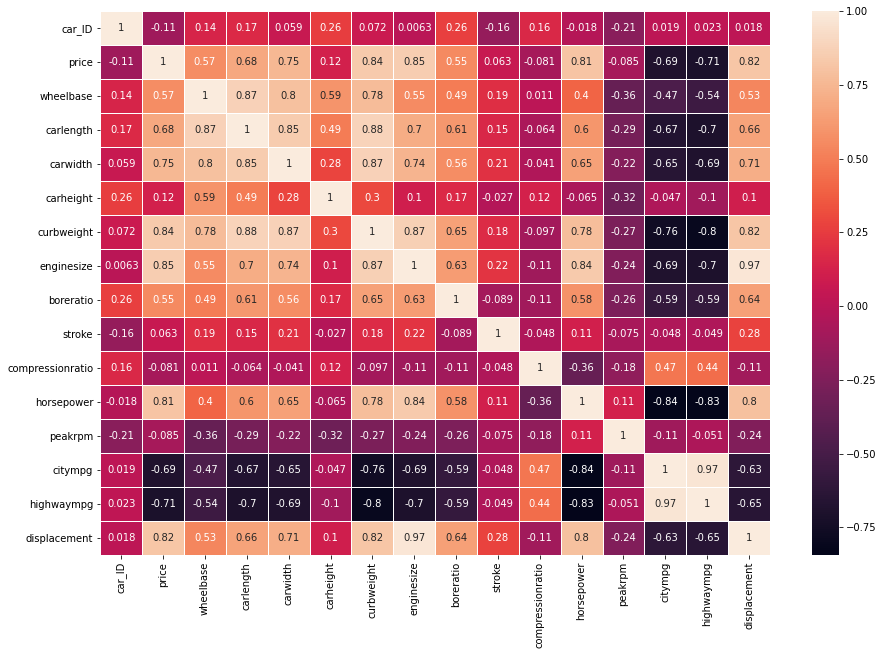

In [31]:
# Plotting the correlation matrix.

plt.figure(figsize = (15,10))  

sns.heatmap(carprice.corr(), annot = True, linewidths = 1)

Price is positively correlated with:

1. wheelbase
2. carlength
3. carwidth
4. curbweight
5. engine size
6. Horse power

Price is negatively correlated with:

1. compressionration
2. peakrpm 
3. citympg
4. highwaympg

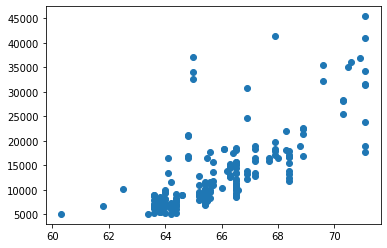

In [32]:
# Effect of carwidth on price of cars.

plt.scatter(carprice['carwidth'], carprice['price'])

# As the carwidth increases, price increases.

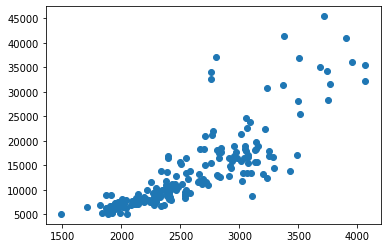

In [33]:
# Effect of curbweight on price of cars.

plt.scatter(carprice['curbweight'], carprice['price'])

# As curbweight increases, price increases.

### **Insights:**

1. Companies like Porsche, Jaguar and BMW produce expensive cars.
2. Cars with engine type ohcv and fuel type gas are expensive.
3. Cars with drivewheel rwd are expensive.
4. Cars with rear engine location are expensive.
5. Price of car increases as number of cylinders increases.
6. Price of car increases as carwidth increases.
7. Price of car increases as curbweight increases.

### **Model building:**

In [34]:
# Scaling the numeric columns before building the model.

scaler = MinMaxScaler()

numeric_cols = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'displacement']

carprice[numeric_cols] = scaler.fit_transform(carprice[numeric_cols])

In [35]:
# Creating dummy varibles for categorical variables.

dummy = pd.get_dummies(carprice, columns = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber','fuelsystem', 'companyname'], drop_first = True)

carprice = pd.concat([carprice, dummy], axis = 1)

carprice.drop(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber','fuelsystem', 'companyname'], axis = 1, inplace = True)

In [36]:
# Dropping "car_ID" as it will not be used for model building.

carprice.drop(['car_ID'], axis = 1, inplace = True)

In [37]:
# Removing duplicate columns from carprice dataset.

carprice = carprice.loc[:,~carprice.columns.duplicated()]

### **Splitting the given data into train and test data.**

In [39]:
# Storing "price" in "y" and other variables in "X".

y = carprice['price']

X = carprice.drop(['price'], axis = 1)

In [40]:
# Splitting X anf y into train and test data.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [41]:
# Using Recursive feature elemination for feature selection.

lm = LinearRegression()

rfe = RFE(lm, 15)  

rfe = rfe.fit(X_train, y_train)

print(rfe.support_) 

print(rfe.ranking_) 

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[False False  True False  True  True  True  True False False False False
 False False False False False False False False False False False False
  True False False False False False  True  True  True  True  True False
  True False False False False False False False False  True False False
 False False False  True False False False False  True False False False
 False False False False False]
[10 19  1  8  1  1  1  1 24 28 15 46 16  4 34 35 11 42 21 20 22 23 47 31
  1 30  2 38 14 39  1  1  1  1  1  3  1 36 26 40 50 27 25 49 32  1 48 17
 13 18 33  1 43 51  9 44  1 12  5 29  7 37 41 45  6]


In [42]:
# Getting names of top 15 variables that have to be used for model building.

feature_names = np.array(X_train.columns)

top_cols = feature_names[rfe.support_]

top_cols

array(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'enginelocation_rear', 'enginetype_rotor', 'cylindernumber_2',
       'cylindernumber_3', 'cylindernumber_4', 'cylindernumber_5',
       'cylindernumber_8', 'companyname_bmw', 'companyname_jaguar',
       'companyname_peugeot'], dtype=object)

In [43]:
# Creating new dataframe as "new_train" with top 15 features.

new_train = X_train[top_cols]

new_train

,carwidth,curbweight,enginesize,boreratio,stroke,enginelocation_rear,enginetype_rotor,cylindernumber_2,cylindernumber_3,cylindernumber_4,cylindernumber_5,cylindernumber_8,companyname_bmw,companyname_jaguar,companyname_peugeot
122,0.324074,0.272692,0.253425,0.307143,0.475000,0,0,0,0,1,0,0,0,0,0
125,0.740741,0.500388,0.616438,1.000000,0.375000,0,0,0,0,1,0,0,0,0,0
166,0.342593,0.314973,0.253425,0.500000,0.350000,0,0,0,0,1,0,0,0,0,0
1,0.351852,0.411171,0.472603,0.664286,0.016667,0,0,0,0,1,0,0,0,0,0
199,0.638889,0.647401,0.472603,0.771429,0.408333,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.472222,0.354926,0.335616,0.450000,0.666667,0,0,0,0,1,0,0,0,0,0
103,0.574074,0.609775,0.821918,0.635714,0.508333,0,0,0,0,0,0,0,0,0,0
67,0.925926,0.786268,0.835616,0.742857,0.816667,0,0,0,0,0,1,0,0,0,0
24,0.324074,0.185803,0.198630,0.307143,0.475000,0,0,0,0,1,0,0,0,0,0


In [44]:
# Creating new dataframe as "new_test" with top 15 features.

new_test = X_test[top_cols]

new_test

,carwidth,curbweight,enginesize,boreratio,stroke,enginelocation_rear,enginetype_rotor,cylindernumber_2,cylindernumber_3,cylindernumber_4,cylindernumber_5,cylindernumber_8,companyname_bmw,companyname_jaguar,companyname_peugeot
160,0.379630,0.235066,0.253425,0.464286,0.308333,0,0,0,0,1,0,0,0,0,0
186,0.481481,0.305275,0.328767,0.464286,0.616667,0,0,0,0,1,0,0,0,0,0
59,0.574074,0.347944,0.417808,0.607143,0.608333,0,0,0,0,1,0,0,0,0,0
165,0.342593,0.301396,0.253425,0.500000,0.350000,0,0,0,0,1,0,0,0,0,0
140,0.324074,0.291699,0.321918,0.771429,0.000000,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,0.398148,0.406129,0.417808,0.571429,0.666667,0,0,0,0,1,0,0,0,0,0
29,0.555556,0.513189,0.650685,0.757143,1.000000,0,0,0,0,1,0,0,0,0,0
182,0.481481,0.299845,0.246575,0.335714,0.616667,0,0,0,0,1,0,0,0,0,0
40,0.203704,0.342901,0.335616,0.435714,0.766667,0,0,0,0,1,0,0,0,0,0


In [45]:
# Adding constant to new_train and new_test.

new_train = sm.add_constant(new_train)

new_test = sm.add_constant(new_test)

In [46]:
# Function to calculate Variance Inflation factor (VIF).

def Cal_VIF(X_train):
    
    vif = pd.DataFrame()
    
    X = X_train
    
    vif['Features'] = X.columns
    
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    vif['VIF'] = round(vif['VIF'], 2)
    
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    return(vif)

In [47]:
# Building linear regression model_1.

model_1 = sm.OLS(y_train, new_train).fit()

print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     131.0
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           1.17e-68
Time:                        05:25:17   Log-Likelihood:                -1288.9
No. Observations:                 143   AIC:                             2608.
Df Residuals:                     128   BIC:                             2652.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4798.4016   1

In [48]:
# Calculating VIF.

VIF = Cal_VIF(new_train)

VIF

/opt/conda/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
7,enginetype_rotor,inf
8,cylindernumber_2,inf
0,const,82.42
3,enginesize,36.39
10,cylindernumber_4,18.35
2,curbweight,11.47
4,boreratio,7.80
1,carwidth,6.46
11,cylindernumber_5,3.07
5,stroke,2.93


In [49]:
# Removing "enginetype_rotor".

new_train = new_train.drop("enginetype_rotor", axis = 1)

In [50]:
# Building model_2.

model_2 = sm.OLS(y_train, new_train).fit()

print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     131.0
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           1.17e-68
Time:                        05:25:43   Log-Likelihood:                -1288.9
No. Observations:                 143   AIC:                             2608.
Df Residuals:                     128   BIC:                             2652.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4798.4016   1

In [51]:
# Calculating VIF.

VIF = Cal_VIF(new_train)

VIF

,Features,VIF
0,const,82.42
3,enginesize,36.39
9,cylindernumber_4,18.35
2,curbweight,11.47
7,cylindernumber_2,8.12
4,boreratio,7.80
1,carwidth,6.46
10,cylindernumber_5,3.07
5,stroke,2.93
8,cylindernumber_3,2.18


In [52]:
# Removing "enginesize" as it has higher VIF.

new_train = new_train.drop(["enginesize"], axis = 1)

In [53]:
# Building model_3.

model_3 = sm.OLS(y_train, new_train).fit()

print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     122.5
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           7.05e-66
Time:                        05:28:39   Log-Likelihood:                -1298.8
No. Observations:                 143   AIC:                             2626.
Df Residuals:                     129   BIC:                             2667.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -386.0749   1

In [54]:
# Calculating VIF.

VIF = Cal_VIF(new_train)

VIF

,Features,VIF
0,const,49.32
2,curbweight,9.14
1,carwidth,6.46
8,cylindernumber_4,5.45
3,boreratio,3.10
9,cylindernumber_5,1.86
13,companyname_peugeot,1.70
6,cylindernumber_2,1.64
12,companyname_jaguar,1.46
10,cylindernumber_8,1.44


In [55]:
# Removing "cylindernumber_4" as it is insignificant and has higher VIF.

new_train = new_train.drop(["cylindernumber_4"], axis = 1)

In [56]:
# Building model_4.

model_4 = sm.OLS(y_train, new_train).fit()

print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     133.7
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           5.99e-67
Time:                        05:29:41   Log-Likelihood:                -1298.8
No. Observations:                 143   AIC:                             2624.
Df Residuals:                     130   BIC:                             2662.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -277.4416    

In [57]:
# Calculating VIF.

VIF = Cal_VIF(new_train)

VIF

,Features,VIF
0,const,21.16
1,carwidth,6.33
2,curbweight,6.14
3,boreratio,2.25
8,cylindernumber_5,1.59
11,companyname_jaguar,1.46
9,cylindernumber_8,1.41
4,stroke,1.33
12,companyname_peugeot,1.33
10,companyname_bmw,1.13


In [58]:
# Removing "boreratio".

new_train = new_train.drop(["boreratio"], axis = 1)

In [59]:
# Building model_5.

model_5 = sm.OLS(y_train, new_train).fit()

print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     145.7
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           8.02e-68
Time:                        05:31:49   Log-Likelihood:                -1299.4
No. Observations:                 143   AIC:                             2623.
Df Residuals:                     131   BIC:                             2658.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -746.1023    

In [60]:
# Calculating VIF.

VIF = Cal_VIF(new_train)

VIF

,Features,VIF
0,const,14.98
1,carwidth,5.89
2,curbweight,5.67
7,cylindernumber_5,1.46
10,companyname_jaguar,1.43
8,cylindernumber_8,1.37
11,companyname_peugeot,1.33
3,stroke,1.13
9,companyname_bmw,1.13
6,cylindernumber_3,1.08


In [61]:
# Removing "stroke".

new_train = new_train.drop(["stroke"], axis = 1)

In [62]:
# Building model_6.

model_6 = sm.OLS(y_train, new_train).fit()

print(model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     161.1
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           7.15e-69
Time:                        05:33:00   Log-Likelihood:                -1299.6
No. Observations:                 143   AIC:                             2621.
Df Residuals:                     132   BIC:                             2654.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -905.3037    

In [63]:
# Calculating VIF.

VIF = Cal_VIF(new_train)

VIF

,Features,VIF
0,const,12.61
1,carwidth,5.80
2,curbweight,5.67
6,cylindernumber_5,1.45
9,companyname_jaguar,1.43
7,cylindernumber_8,1.34
10,companyname_peugeot,1.33
8,companyname_bmw,1.13
5,cylindernumber_3,1.08
3,enginelocation_rear,1.03


In [64]:
# Removing "cylindernumber_2".

new_train = new_train.drop(["cylindernumber_2"], axis = 1)

In [65]:
# Building model_7.

model_7 = sm.OLS(y_train, new_train).fit()

print(model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     176.3
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           2.11e-69
Time:                        05:33:56   Log-Likelihood:                -1301.1
No. Observations:                 143   AIC:                             2622.
Df Residuals:                     133   BIC:                             2652.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -912.1205    

In [66]:
# Calculating VIF.

VIF = Cal_VIF(new_train)

VIF

,Features,VIF
0,const,12.61
1,carwidth,5.77
2,curbweight,5.65
5,cylindernumber_5,1.44
8,companyname_jaguar,1.43
6,cylindernumber_8,1.33
9,companyname_peugeot,1.33
7,companyname_bmw,1.12
4,cylindernumber_3,1.08
3,enginelocation_rear,1.03


In [67]:
# Removing "cylindernumber_5".

new_train = new_train.drop(["cylindernumber_5"], axis = 1)

In [68]:
# Building model_8.

model_8 = sm.OLS(y_train, new_train).fit()

print(model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     194.9
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           6.71e-70
Time:                        05:35:14   Log-Likelihood:                -1302.7
No. Observations:                 143   AIC:                             2623.
Df Residuals:                     134   BIC:                             2650.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1431.5469    

In [69]:
# Removing "cylindernumber_3".

new_train = new_train.drop(["cylindernumber_3"], axis = 1)

In [70]:
# Building model_9.

model_9 = sm.OLS(y_train, new_train).fit()

print(model_9.summary())

# All varibles are significant. Hence model_9 will be used for predicting test data.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     210.8
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           2.05e-69
Time:                        05:36:00   Log-Likelihood:                -1306.8
No. Observations:                 143   AIC:                             2630.
Df Residuals:                     135   BIC:                             2653.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -995.8183    

### **Model evaluation**

In [72]:
# Dropping the varibles in test data that were removed during variable selection from train data.

new_test = new_test.drop(['enginesize', 'boreratio', 'stroke', 'enginetype_rotor', 'cylindernumber_2',
       'cylindernumber_3', 'cylindernumber_4', 'cylindernumber_5'], axis = 1)

In [73]:
# Using model_9 for predicting test data and storing predictions as "y_pred".

y_pred = model_9.predict(new_test)

In [74]:
# Calculating R_Squared value for test data.

r2_score(y_test, y_pred)

# R_Squared is 90.71% on test data. 

0.9071420796186869

### **Conclusions:**

1. Coefficient of regression (R_Squared) is 90.71% on test data. Hence the model is a descent model.

2. Price of car depends on the following attributes:
* carwidth
* Curbweight
* enginelocation_rear
* cylindernumber_8
* companyname_bmw
* companyname_jaguar
* companyname_peugeot

Hence Geely automobiles should consider above mentioned attributes to design their cars in order to enter the US market.
